In [1]:
import time

import matplotlib.pyplot as plt

from utils.generate_phrases import generate_random_phrase, alphabet

In [3]:
# Time Analysis
phrase_size = int(1e2)

t1 = time.time()
new_phrase = generate_random_phrase(phrase_size, alphabet)
t2 = time.time()

print(f"Took {t2 - t1} seconds to generate a phrase with {phrase_size} letters using sequential")

# t1 = time.time()
# new_phrase = generate_random_phrase(phrase_size, alphabet, parallel=True)
# t2 = time.time()

# print(f"Took {t2 - t1} seconds to generate a phrase with {phrase_size} letters using parallel")

Took 0.0001366138458251953 seconds to generate a phrase with 100 letters using sequential


In [4]:
def generate_phrases(phrase:str, log_gen:bool=False):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen:int = 0
    while True:
        new_phrase = generate_random_phrase(phrase_size, alphabet)
        gen += 1
        
        if new_phrase == phrase:
            break

        if gen % 100000 == 0 and log_gen:
            print(f'Generation: {gen:,}')
    
    return gen

Found "G" in 6 generations
Found "GA" in 30 generations
Found "GAG" in 72 generations
Found "GAGC" in 201 generations
Found "GAGCC" in 1,328 generations
Found "GAGCCC" in 3,799 generations
Took 0.019387006759643555 seconds to find all the phrases


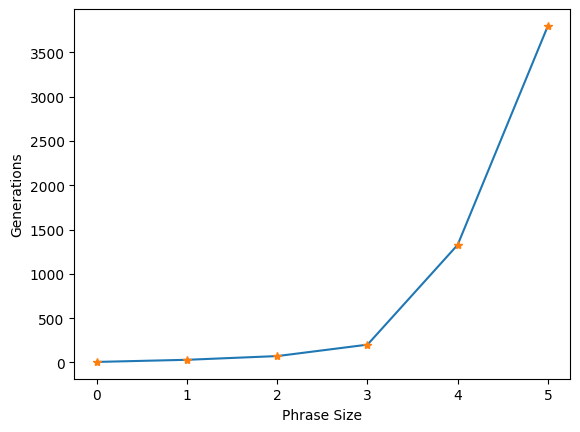

In [5]:
# phrase = 'banan'
phrase = 'GAGCCC'#TCAATCAGGCATACC'

phrase_i = ''
gens = []

t1 = time.time()
for letter in phrase:
    phrase_i += letter
    gen = generate_phrases(phrase_i)

    gens.append(gen)
    print(f'Found "{phrase_i}" in {gen:,} generations')
t2 = time.time()

print(f"Took {t2 - t1} seconds to find all the phrases")

plt.plot(gens)
plt.plot(gens, '*')
plt.xlabel('Phrase Size')
plt.ylabel('Generations')
plt.show()

In [6]:
# phrase = 'bana'
phrase = 'GAGCCC'#TCAATCAGGCA'#TACC'

t1 = time.time()
gen = generate_phrases(phrase)
t2 = time.time()

print(f'Found "{phrase}" in {gen:,} generations and took {round(t2 - t1, 4):,} seconds')

Found "GAGCCC" in 2,623 generations and took 0.0111 seconds
